# Project - Regression Modeling with the Ames Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Ames Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'ames.csv' as a pandas dataframe

In [1]:
import warnings
from importlib import reload

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as sms
from statsFunctions import check_model as sf
from statsFunctions import calc_adjr_and_VIF as clc

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'data\ames.csv')

In [44]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
dfint = df.select_dtypes(include='int64')
dffloat = df.select_dtypes(include='float64')
dfobj = df.select_dtypes(include='object')
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_noobj = df.select_dtypes(exclude=['object'])
df_noobj = df_noobj.dropna()
df_noobj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalf

In [8]:
df_clean = df_noobj
df_clean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [9]:
df_clean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [10]:
df_clean = df_clean.drop(columns=['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MoSold'])

In [11]:
df_clean.head()
df_clean = df_clean.drop(columns=['TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','Fireplaces','GarageYrBlt'])

In [12]:
df_clean = df_clean.drop(columns=['BsmtFinSF2'])
df_clean.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,GarageCars,GarageArea,PoolArea,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,1710,1,0,2,1,2,548,0,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1262,0,1,2,0,2,460,0,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1786,1,0,2,1,2,608,0,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1717,1,0,1,0,3,642,0,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2198,1,0,2,1,3,836,0,2008,250000


In [13]:
df_clean = df_clean.drop(columns=['MasVnrArea','BsmtFullBath','BsmtHalfBath','PoolArea'])
df_clean.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,GarageCars,GarageArea,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,706,150,...,856,854,0,1710,2,1,2,548,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,978,284,...,1262,0,0,1262,2,0,2,460,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,486,434,...,920,866,0,1786,2,1,2,608,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,216,540,...,961,756,0,1717,1,0,3,642,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,655,490,...,1145,1053,0,2198,2,1,3,836,2008,250000


In [14]:
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1121 non-null   int64  
 1   MSSubClass    1121 non-null   int64  
 2   LotFrontage   1121 non-null   float64
 3   LotArea       1121 non-null   int64  
 4   OverallQual   1121 non-null   int64  
 5   OverallCond   1121 non-null   int64  
 6   YearBuilt     1121 non-null   int64  
 7   YearRemodAdd  1121 non-null   int64  
 8   BsmtFinSF1    1121 non-null   int64  
 9   BsmtUnfSF     1121 non-null   int64  
 10  TotalBsmtSF   1121 non-null   int64  
 11  1stFlrSF      1121 non-null   int64  
 12  2ndFlrSF      1121 non-null   int64  
 13  LowQualFinSF  1121 non-null   int64  
 14  GrLivArea     1121 non-null   int64  
 15  FullBath      1121 non-null   int64  
 16  HalfBath      1121 non-null   int64  
 17  GarageCars    1121 non-null   int64  
 18  GarageArea    1121 non-null 

In [15]:
X = df_clean[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GrLivArea','FullBath','GarageArea','YrSold']]
y = df_clean['SalePrice']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 20)

In [17]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

LinearRegression()

In [18]:
# evaluate the model on the testing data
a1 = reg.score(X_test, y_test)
X_train.shape
a1

0.8237916050025831

In [19]:
r2train = reg.score(X_train,y_train)
r2test = reg.score(X_test, y_test) 
num_obtrain = X_train.shape[0]
num_obtest = X_test.shape[0]
ptrain = X_train.shape[1]
ptest = X_test.shape[1]

In [20]:
# compare the r2 scores of the model on the training and test data
r2tra, r2tes = reg.score(X_train,y_train),reg.score(X_test,y_test)
print(r2tra)
print(r2tes)

0.7564550175194908
0.8237916050025831


In [3]:
clc(r2tra,num_obtrain,ptrain)

NameError: name &#39;r2tra&#39; is not defined

In [23]:
calc_adjr_and_VIF(r2tes,num_obtest,ptest)

Adjusted R^2 is:  0.8155575678531711
VIF score is:  5.421745898492225


5.421745898492225

In [24]:
new_data = pd.DataFrame()
reg.predict(X)

array([226778.0577668 , 184055.95757898, 235011.0001633 , ...,
       238145.71402416, 118605.41359192, 135004.85245582])

In [25]:
df_clean['PredictedSalePrice'] = reg.predict(X)

In [26]:
df.style.format({
    'PredictedSalePrice': '{:,.002f}'.format
})
df_clean.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,GarageCars,GarageArea,YrSold,SalePrice,PredictedSalePrice
0,1,60,65.0,8450,7,5,2003,2003,706,150,...,854,0,1710,2,1,2,548,2008,208500,226778.057767
1,2,20,80.0,9600,6,8,1976,1976,978,284,...,0,0,1262,2,0,2,460,2007,181500,184055.957579
2,3,60,68.0,11250,7,5,2001,2002,486,434,...,866,0,1786,2,1,2,608,2008,223500,235011.000163
3,4,70,60.0,9550,7,5,1915,1970,216,540,...,756,0,1717,1,0,3,642,2006,140000,187350.000601
4,5,60,84.0,14260,8,5,2000,2000,655,490,...,1053,0,2198,2,1,3,836,2008,250000,295742.530915


In [27]:
df_clean['Residuals'] = df_clean['PredictedSalePrice']-df_clean['SalePrice']

In [28]:
df_clean.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,LowQualFinSF,GrLivArea,FullBath,HalfBath,GarageCars,GarageArea,YrSold,SalePrice,PredictedSalePrice,Residuals
0,1,60,65.0,8450,7,5,2003,2003,706,150,...,0,1710,2,1,2,548,2008,208500,226778.057767,18278.057767
1,2,20,80.0,9600,6,8,1976,1976,978,284,...,0,1262,2,0,2,460,2007,181500,184055.957579,2555.957579
2,3,60,68.0,11250,7,5,2001,2002,486,434,...,0,1786,2,1,2,608,2008,223500,235011.000163,11511.000163
3,4,70,60.0,9550,7,5,1915,1970,216,540,...,0,1717,1,0,3,642,2006,140000,187350.000601,47350.000601
4,5,60,84.0,14260,8,5,2000,2000,655,490,...,0,2198,2,1,3,836,2008,250000,295742.530915,45742.530915


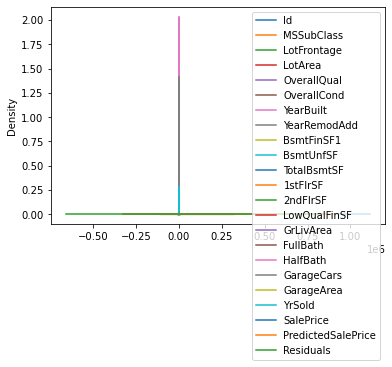

In [37]:
columns = list(df_clean)
for i in columns:
    df_clean[i].plot.kde()
    plt.legend()

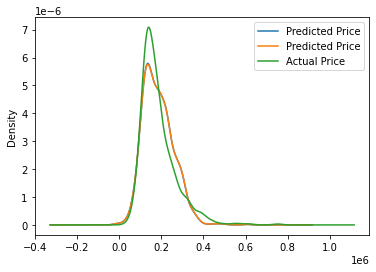

In [65]:
df_clean['PredictedSalePrice'].plot.kde(label='Predicted Price')
df_clean['PredictedSalePrice2'].plot.kde(label='Predicted Price')
df_clean['SalePrice'].plot.kde(label='Actual Price')
plt.legend()

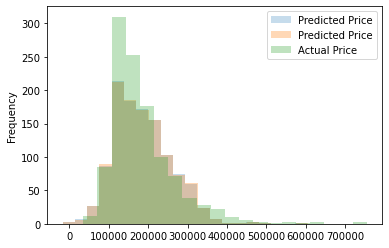

In [67]:
df_clean['PredictedSalePrice'].plot.hist(label='Predicted Price', alpha=.25, bins =20)
df_clean['PredictedSalePrice2'].plot.hist(label='Predicted Price', alpha=.3, bins =20)
df_clean['SalePrice'].plot.hist(label='Actual Price', alpha=.3, bins =20)
plt.legend()

In [45]:
from sklearn.feature_selection import f_regression
p_values = f_regression(X_train,y_train)[1]
p_values.round(3)
# it looks as though year sold is not statistically significant to the model - let's do another analysis and remove 'YrSold'

array([0.03 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.676])

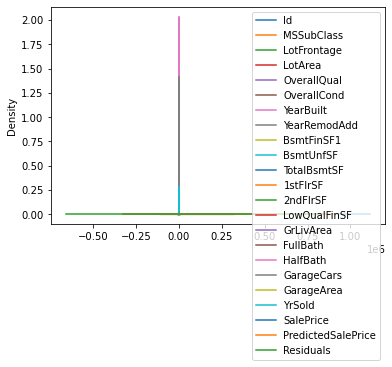

In [39]:
X = df_clean[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GrLivArea','FullBath','GarageArea']]
y = df_clean['SalePrice']



In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 20)
# make test size larger this time.

In [50]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)

LinearRegression()

In [51]:
a1 = reg.score(X_test, y_test)
X_train.shape
a1

0.8267816296338957

In [52]:
r2train = reg.score(X_train,y_train)
r2test = reg.score(X_test, y_test) 
num_obtrain = X_train.shape[0]
num_obtest = X_test.shape[0]
ptrain = X_train.shape[1]
ptest = X_test.shape[1]

In [54]:
r2tra, r2tes = reg.score(X_train,y_train),reg.score(X_test,y_test)
print(r2tra)
print(r2tes)

0.7526820774395897
0.8267816296338957


In [55]:
calc_adjr_and_VIF(r2tra,num_obtrain,ptrain)

Adjusted R^2 is:  0.750000316833513
VIF score is:  4.000005069342632


4.000005069342632

In [56]:
calc_adjr_and_VIF(r2tes,num_obtest,ptest)

Adjusted R^2 is:  0.8210289900276413
VIF score is:  5.587497104444154


5.587497104444154

In [59]:
df_clean['PredictedSalePrice2'] = reg.predict(X)
df_clean['Residuals2'] = df_clean['PredictedSalePrice2']-df_clean['SalePrice']

In [72]:
residuals = df_clean['Residuals'].sum() + df_clean['Residuals2'].sum()
print(df_clean['Residuals'].sum())
print(df_clean['Residuals2'].sum())

-161619.62408052268
105578.09920189623


In [73]:
residuals # difference from

-56041.52487862646

In [60]:
df_clean.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,FullBath,HalfBath,GarageCars,GarageArea,YrSold,SalePrice,PredictedSalePrice,Residuals,PredictedSalePrice2,Residuals2
0,1,60,65.0,8450,7,5,2003,2003,706,150,...,2,1,2,548,2008,208500,226778.057767,18278.057767,226764.345149,18264.345149
1,2,20,80.0,9600,6,8,1976,1976,978,284,...,2,0,2,460,2007,181500,184055.957579,2555.957579,184097.727484,2597.727484
2,3,60,68.0,11250,7,5,2001,2002,486,434,...,2,1,2,608,2008,223500,235011.000163,11511.000163,235131.509017,11631.509017
3,4,70,60.0,9550,7,5,1915,1970,216,540,...,1,0,3,642,2006,140000,187350.000601,47350.000601,189523.905025,49523.905025
4,5,60,84.0,14260,8,5,2000,2000,655,490,...,2,1,3,836,2008,250000,295742.530915,45742.530915,296665.149666,46665.149666


In [ ]:
# formula = 'Quantity ~ C(Discount)'
# lm = ols(formula, df).fit()
# table = sm.stats.anova_lm(lm, typ=2)
# print(table)
# # perform test
# multicompare_discount = ssm.MultiComparison(df['Quantity'], df['Discount'])
# tukey_hsd = multicompare_discount.tukeyhsd()
# tukey_hsd.summary()

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

Clearly, the results are not very reliable. The best R-Squared is witnessed with `OverallQual`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Ames dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.